<a href="https://colab.research.google.com/github/aurimas12/task/blob/master/energy_advice_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import pytz
import matplotlib.pyplot as plt

In [2]:
class MeteoData:
    def __init__(self, location_code, api_url):
        self.location_code = location_code
        self.api_url = api_url

    def fetch_historical_data(self, start_date=None, end_date=None):
        url = f"{self.api_url}/places/{self.location_code}/forecasts/long-term"

        if start_date is None:
            start_date = (datetime.now() - timedelta(days=365)).strftime('%Y-%m-%dT%H:%M:%S')
        if end_date is None:
            end_date = datetime.now().strftime('%Y-%m-%dT%H:%M:%S')

        response = requests.get(url)
        data = response.json()
        forecast_data = data['forecastTimestamps']

        dataframe = pd.DataFrame(forecast_data)
        dataframe['forecastTimeUtc'] = pd.to_datetime(dataframe['forecastTimeUtc'])
        dataframe.set_index('forecastTimeUtc', inplace=True)
        dataframe1 = dataframe.loc[start_date:end_date]

        return dataframe1

    def fetch_forecast_data(self):
        url = f"{self.api_url}/places/{self.location_code}/forecasts/long-term"
        response = requests.get(url)
        data = response.json()
        forecast_data = data['forecastTimestamps']

        dataframe = pd.DataFrame(forecast_data)
        dataframe['forecastTimeUtc'] = pd.to_datetime(dataframe['forecastTimeUtc'])
        dataframe.set_index('forecastTimeUtc', inplace=True)
        return dataframe

In [3]:
location_code = 'vilnius'  # Vietovės kodas, pavyzdys: Vilnius
api_url = 'https://api.meteo.lt/v1'  # API URL

meteo = MeteoData(location_code, api_url)

# Istorinių duomenų nuskaitymas
# historical_data = meteo.fetch_historical_data() # uz metus visus
historical_data = meteo.fetch_historical_data(start_date='2024-04-01T00:00:00', end_date='2024-04-16T00:00:00')

# Prognozės duomenų nuskaitymas
forecast_data = meteo.fetch_forecast_data()

In [4]:
# Istoriniai duomenys
forecast_data.head()

,airTemperature,feelsLikeTemperature,windSpeed,windGust,windDirection,cloudCover,seaLevelPressure,relativeHumidity,totalPrecipitation,conditionCode
forecastTimeUtc,,,,,,,,,,
2024-04-10 14:00:00,21.3,21.3,5,10,295,25,1018,56,0.0,partly-cloudy
2024-04-10 15:00:00,20.0,20.0,5,10,299,65,1018,53,0.0,cloudy-with-sunny-intervals
2024-04-10 16:00:00,17.9,17.9,6,11,298,98,1020,51,0.0,cloudy
2024-04-10 17:00:00,15.5,15.5,6,11,300,99,1021,52,0.0,cloudy
2024-04-10 18:00:00,13.6,13.6,6,12,300,99,1022,58,0.0,cloudy


In [5]:
historical_data

,airTemperature,feelsLikeTemperature,windSpeed,windGust,windDirection,cloudCover,seaLevelPressure,relativeHumidity,totalPrecipitation,conditionCode
forecastTimeUtc,,,,,,,,,,
2024-04-10 14:00:00,21.3,21.3,5,10,295,25,1018,56,0.0,partly-cloudy
2024-04-10 15:00:00,20.0,20.0,5,10,299,65,1018,53,0.0,cloudy-with-sunny-intervals
2024-04-10 16:00:00,17.9,17.9,6,11,298,98,1020,51,0.0,cloudy
2024-04-10 17:00:00,15.5,15.5,6,11,300,99,1021,52,0.0,cloudy
2024-04-10 18:00:00,13.6,13.6,6,12,300,99,1022,58,0.0,cloudy
...,...,...,...,...,...,...,...,...,...,...
2024-04-15 12:00:00,12.2,12.2,2,8,231,47,1011,39,0.0,partly-cloudy
2024-04-15 15:00:00,12.0,12.0,3,8,201,94,1009,37,0.0,cloudy
2024-04-15 18:00:00,9.1,9.1,4,7,169,100,1008,58,0.0,cloudy


In [6]:
# Vidutinė metų temperatūra
historical_data['airTemperature'].mean()

11.279746835443039

In [7]:
# Vidutinė metų temperatūra, oro drėgmė
historical_data['relativeHumidity'].mean()

65.25316455696202

In [8]:

lt_timezone = pytz.timezone('Europe/Vilnius')

end_date = datetime.now()
start_date = end_date - timedelta(days=365)
start_date = lt_timezone.localize(start_date)
end_date = lt_timezone.localize(end_date)

historical_data = meteo.fetch_historical_data(start_date=start_date.strftime('%Y-%m-%dT%H:%M:%S'),
                                               end_date=end_date.strftime('%Y-%m-%dT%H:%M:%S'))

daytime_temperatures = historical_data.between_time('08:00', '20:00')['airTemperature']
nighttime_temperatures = historical_data[~historical_data.index.isin(daytime_temperatures.index)]['airTemperature']

average_day_temperature = daytime_temperatures.mean()
average_night_temperature = nighttime_temperatures.mean()

print(f'Vidutinė metų dienos temperatūra: {average_day_temperature:.2f} °C')
print(f'Vidutinė metų nakties temperatūra: {average_night_temperature:.2f} °C')

Vidutinė metų dienos temperatūra: 20.65 °C
Vidutinė metų nakties temperatūra: nan °C


In [9]:
rain_forecasts = forecast_data[forecast_data['conditionCode'].isin(['isolated-thunderstorms', 'thunderstorms', 'heavy-rain-with-thunderstorms', 'light-rain', 'rain', 'heavy-rain'])].copy()
rain_forecasts['weekday'] = rain_forecasts.index.weekday
rain_forecasts['is_weekend'] = rain_forecasts['weekday'].isin([5, 6])
rain_weekends_count = rain_forecasts.groupby('is_weekend').size()
rain_weekend_count = rain_forecasts['is_weekend'].sum()

print(f"Per laikotarpį buvo prognozuota lietaus {rain_weekend_count} kartus savaitgaliuose.")


Per laikotarpį buvo prognozuota lietaus 8 kartus savaitgaliuose.


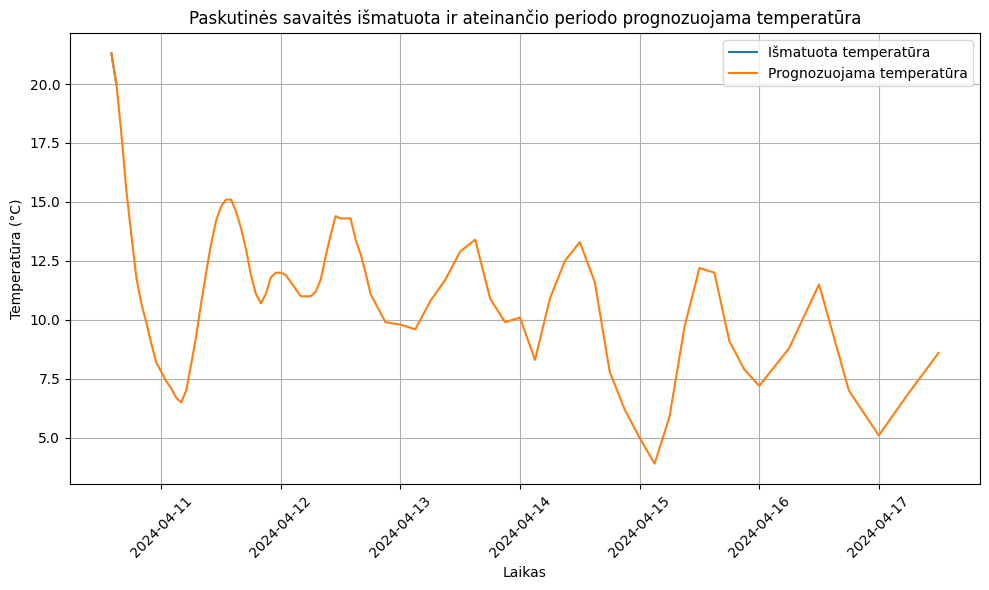

In [10]:
forecast_data=forecast_data.rename(columns={'airTemperature':'temperature'})
merged_data = pd.concat([historical_data, forecast_data])

plt.figure(figsize=(10, 6))
plt.plot(merged_data.index, merged_data['airTemperature'], label='Išmatuota temperatūra')
plt.plot(merged_data.index, merged_data['temperature'], label='Prognozuojama temperatūra')
plt.title('Paskutinės savaitės išmatuota ir ateinančio periodo prognozuojama temperatūra')
plt.xlabel('Laikas')
plt.ylabel('Temperatūra (°C)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
def calculate_intermediate_values(temperature_series):
    # Resampliuoti temperatūros seriją kas 5 minutes
    resampled_series = temperature_series.resample('5T').asfreq()

    # Interpoliuoti tarpines reikšmes
    interpolated_series = resampled_series.interpolate(method='linear')

    return interpolated_series

In [13]:
interpolated_series = calculate_intermediate_values(forecast_data['temperature']).round(2)

print(interpolated_series)

forecastTimeUtc
2024-04-10 14:00:00    21.30
2024-04-10 14:05:00    21.19
2024-04-10 14:10:00    21.08
2024-04-10 14:15:00    20.98
2024-04-10 14:20:00    20.87
                       ...  
2024-04-17 11:40:00     8.51
2024-04-17 11:45:00     8.53
2024-04-17 11:50:00     8.55
2024-04-17 11:55:00     8.58
2024-04-17 12:00:00     8.60
Freq: 5T, Name: temperature, Length: 1993, dtype: float64
